Workflow

* Pre-processing
 * Exploratory analysis
 * Missing data
 * Outliers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data
df = pd.read_csv('train.csv')

# Hello Moto!

In [3]:
# Overview
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
# Get columns names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# What do we expect?

xxx

* PassengerId
 * This is just an unique identification of each passenger. It is not expected to be relevant for our analysis.
* Survived
 * Crucial variable. To not sink in this exercise, our life depends on it.
* Pclass
 * This is the ticket class. According to [Marx](https://en.wikipedia.org/wiki/Karl_Marx), this should have an effect on the survival rate.
* Name
 * There are several studies (xxx, xxx, xxx) suggesting the influence of a name, especially when it is accompanied by a title. Let's keep an eye on this.
* Sex
 * Definetely important.
* Age
 * Why are women and children evacuated first in a disaster? So we can think about a solution in silence.
* SibSp
 * Number of siblings/spouses aboard the Titanic. It will be important to understand if people where travelling alone or with their family.  	
* Parch
 * Number of parents/children aboard the Titanic. Plays with SibSp.
* Ticket
 * This is the ticket number. Unless it has some information about places, it shouldn't be important for prediction purposes.
* Fare
 * Same as Pclass. Let's see how funny it is to have [money in a rich man's world](https://youtu.be/wCtBVPnKDIA).
* Cabin
 * The cabin number can indicate where people were during the disaster. It wouldn't be surprising if it had some [influence](https://www.huffingtonpost.com/entry/safest-seat-on-a-plane_us_58f7dbd8e4b091e58f382505) in the final result.
* Embarked
 * When the sun rises, it rises for everyone. It's not expectable that people coming from Cherbourg are more unlucky than people coming from Southampton. Unless there is some second order effect, [like refusing to run away to keep your honor as a man](http://www.mindblowing-facts.org/2013/07/the-only-japanese-who-survived-the-titanic-lost-his-job-because-he-was-known-as-a-coward-in-japan-for-not-dying-with-the-other-passengers/), I would say that this variable is not important.
 
 
 
Paste:
* The social norm of "women and children first" Read more: http://www.dailymail.co.uk/sciencetech/article-1254788/Why-women-children-saved-Titanic-Lusitania.html#ixzz54KETWEPr

# Before we start...

xxx

Continuous variables xxx. int64, float64, object

By contrast, categorical variables xxx.
* limited, and usually fixed, number of possible values

In [5]:
# Get variables type
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

* PassengerID. It's not relevant because it doesn't have any effect in the analysis.
* Survived. We should change to categorical.
* Pclass. Like 'Survived', we should change to categorical.
* Name. For now it can remain as a string.
* Sex. It is a categorical variable.
* Age. Continuous variable.
* SibSp. It is a continuous variables.
* Parch. Continuous variable.
* Ticket. Like name, it should be solved later.
* Fare. Continuous.
* Cabin. Solved later.
* Embarked. Categorical.

Different way to organize:
* Continuous variables.
* Categorical variables.
* Text variables.

In [6]:
# Change variables to categorical data
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['SibSp'] = df['SibSp'].astype('category')

In [7]:
# Debug
df.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp          category
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

In [8]:
# Delete columns that we don't need
df = df.drop('PassengerId', axis=1)

In [9]:
# Debug
df.head()

Survived Pclass                                               Name     Sex  \
0        0      3                            Braund, Mr. Owen Harris    male   
1        1      1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2        1      3                             Heikkinen, Miss. Laina  female   
3        1      1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4        0      3                           Allen, Mr. William Henry    male   

    Age SibSp  Parch            Ticket     Fare Cabin Embarked  
0  22.0     1      0         A/5 21171   7.2500   NaN        S  
1  38.0     1      0          PC 17599  71.2833   C85        C  
2  26.0     0      0  STON/O2. 3101282   7.9250   NaN        S  
3  35.0     1      0            113803  53.1000  C123        S  
4  35.0     0      0            373450   8.0500   NaN        S

# Testing our assumptions

Human beings are known in the galaxy for their cognitive bias (xxx). Accordingly, everytime we xxx, we should follow a 'falsibility' mindset. This concept arouse in the xx's by the hand of Karl Popper. Its main idea is that xxx.

We will start by testing our assumptions using box plots. Box plots are xxx. In this case they are particularly important because most of our data is categorical. Thus, xxx.

## PClass

In [23]:
# Table of survival vs passenger class
survived_class = pd.crosstab(index=df["Survived"],
                             columns=df["Pclass"],
                             margins=True)
survived_class.columns = ["Class 1","Class 2","Class 3",'rowTotal']
survived_class.index= ["Died","Survived",'colTotal']
survived_class

Class 1  Class 2  Class 3  rowTotal
Died           80       97      372       549
Survived      136       87      119       342
colTotal      216      184      491       891

In [25]:
# Table of survival vs passenger class (%)
survived_class_pct = survived_class/survived_class.loc["colTotal","rowTotal"]
survived_class_pct

Class 1   Class 2   Class 3  rowTotal
Died      0.089787  0.108866  0.417508  0.616162
Survived  0.152637  0.097643  0.133558  0.383838
colTotal  0.242424  0.206510  0.551066  1.000000

In [38]:
# Plot

xxx

## Sex

In [42]:
# Table of survival vs passenger sex
survived_sex = pd.crosstab(index=df["Survived"],
                             columns=df["Sex"],
                             margins=True)
survived_sex.columns = ["Female","Male",'rowTotal']
survived_sex.index= ["Died","Survived",'colTotal']
survived_sex

Female  Male  rowTotal
Died          81   468       549
Survived     233   109       342
colTotal     314   577       891

In [43]:
# Table of survival vs passenger sex (%)
survived_sex_pct = survived_sex/survived_sex.loc["colTotal","rowTotal"]
survived_sex_pct

Female      Male  rowTotal
Died      0.090909  0.525253  0.616162
Survived  0.261504  0.122334  0.383838
colTotal  0.352413  0.647587  1.000000

In [ ]:
# Plot

xxx

## Age

We could bin data according to some statistical rule (Sturge's rule). However, let's think. Imagine that you're in the Titanic. How would you define who's a kid and who's an adult? Using a statistical rule? Probably not. The most common would say to define someone with less than xxx years old as a kid.

The Titanic sunk in 1912. Back then, the average life expectancy in Europe and United States was about 45 years old (source)[https://ourworldindata.org/life-expectancy]. This means that in your 20s you're already in your adulthood. Notice that it is expected that people travelling in Titanic would have an higher life expectancy, since it was a trip for rich people. 

Today, our life expectancy is between 75-80 years old and we consider that:

* You're a children if xxx.
* You're an adult if xxx.
* You're an ancient if xxx.
(source)[http://www.institute4learning.com/resources/articles/the-12-stages-of-life/]

The life expectancy increase has been almost linear. So, if we linearly extrapolate what we know now, we can assume that in 1912:

* You'd be a children up to xxx years old.
* You'd be an adult up to xxx years old.
* You'd be an ancien up to xxx years old.

Now, you ask me why I didn't just go and check for life stage and age papers from the early 1900 to set up these categories. I could argue that I avoided that because know we have a different way to look at this problems (it was even before Piaget and the childhood development notions!). However, the truth is that only after analysing all of this I realized that it would be easier to just check papers from that time. Nonetheless, the rational stays. We can even use those papers and see if we did a good interpretation. But we don't need. That will show if we're wrong or not.

Accordingly, we will define the borders of the bin data using xxx.

* Is it a statistical rule?

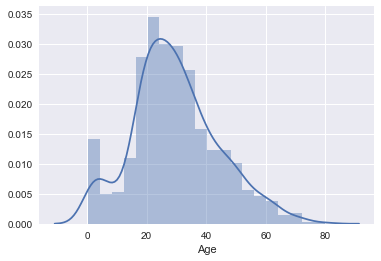

In [50]:
sns.distplot(df['Age'].dropna())

## Class and sex

In [45]:
surv_sex_class = pd.crosstab(index=df["Survived"], 
                             columns=[df["Pclass"],
                                      df["Sex"]],
                             margins=True)   
surv_sex_class

Pclass        1           2           3       All
Sex      female male female male female male     
Survived                                         
0             3   77      6   91     72  300  549
1            91   45     70   17     72   47  342
All          94  122     76  108    144  347  891

In [47]:
surv_sex_class/surv_sex_class.loc["All"]    # Divide by column totals

Pclass           1                   2                3                 All
Sex         female      male    female      male female      male          
Survived                                                                   
0         0.031915  0.631148  0.078947  0.842593    0.5  0.864553  0.616162
1         0.968085  0.368852  0.921053  0.157407    0.5  0.135447  0.383838
All       1.000000  1.000000  1.000000  1.000000    1.0  1.000000  1.000000

# Preparing the data set

In [68]:
# Descriptive statistics
df.describe()

Age       Parch        Fare
count  714.000000  891.000000  891.000000
mean    29.699118    0.381594   32.204208
std     14.526497    0.806057   49.693429
min      0.420000    0.000000    0.000000
25%     20.125000    0.000000    7.910400
50%     28.000000    0.000000   14.454200
75%     38.000000    0.000000   31.000000
max     80.000000    6.000000  512.329200

I confess that descriptive statistics is something that I used to do without knowing why. I was just doing because it was a standard thing to do. Now, I've a different idea of descriptive statistics. When I do it, I'm essentially looking for:

* Max or min values that doesn't make sense (extract line from Kelleher 2015). 
* Assess the variability of the data (standard deviation ratio???).
* Get an idea of the most common values (quartiles).

In this case, we can see that all the values seem to be in a range of plausible values. For example, xxx.

Although there are some values completely out of the range. For example, 'Fare' has ~512.33 as maximum value and its 75% quartile is 31. This can suggest that ~512.33 is an outlier. However, knowing the meaning of 'Fare' it's worth to consider that maybe it makes more sense to bin the data and have something like 'Cheap', 'Normal' and 'Expensive' fares.

## Missing data

## Outliers